In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [17]:

(x_train, y_train), (x_test, y_test) = sns.load_dataset('tips')

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])




ValueError: too many values to unpack (expected 2)

In [6]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape = [28,28]),
keras.layers.Dense(300,activation = 'relu'),
keras.layers.Dense(100, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'sgd',
             metrics = 'accuracy')

In [13]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1532/1532 [==============================] - 2s 1ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7187 - val_accuracy: 0.1114
Epoch 2/10
1532/1532 [==============================] - 2s 2ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7188 - val_accuracy: 0.1114
Epoch 3/10
1532/1532 [==============================] - 2s 2ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7188 - val_accuracy: 0.1114
Epoch 4/10
1532/1532 [==============================] - 2s 2ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7187 - val_accuracy: 0.1114
Epoch 5/10
1532/1532 [==============================] - 2s 2ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7187 - val_accuracy: 0.1114
Epoch 6/10
1532/1532 [==============================] - 2s 2ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7188 - val_accuracy: 0.1114
Epoch 7/10
1532/1532 [==============================] - 2s 2ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.7187 - val_accuracy:

(0.0, 1.0)

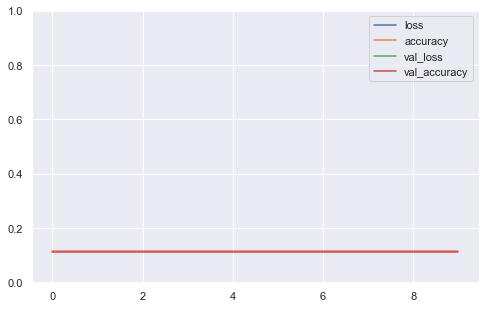

In [15]:

sns.set_theme()

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)